In [307]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [352]:
def get_approaches_results(datasets, column_mean, column_std, group_by_th = False):
    mean = []
    std = []
    #initial
    if group_by_th == True:
        ths = datasets[0]["threshold"]
        for th in ths:
            for data in datasets:
                data = data[data["threshold"]==th]
                if(column_mean == 'cost'):
                    vals = data[column_mean]/data['cost_ratio'][0]/1000
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]/data['cost_ratio'][0]/1000
                    for s in vals_std:
                        std.append(s)
                else:
                    vals = data[column_mean]
                    for v in vals:
                        mean.append(v)
                    vals_std = data[column_std]
                    for s in vals_std:
                        std.append(s)
    else:
        for data in datasets:
            if(column_mean == 'cost'):
                vals = data[column_mean]/data['cost_ratio']/1000
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]/data['cost_ratio']/1000
                for s in vals_std:
                    std.append(s)
            else:
                vals = data[column_mean]
                for v in vals:
                    mean.append(v)
                vals_std = data[column_std]
                for s in vals_std:
                    std.append(s)
        
    return mean, std

def get_group_colors(groups, subgroups):
    #colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
    return np.concatenate([[np.concatenate(np.random.rand(3,1))] * subgroups for x in range(groups)])

In [353]:
get_group_colors(4,2)

array([[0.60863734, 0.44449881, 0.02895154],
       [0.60863734, 0.44449881, 0.02895154],
       [0.03581213, 0.81586239, 0.478162  ],
       [0.03581213, 0.81586239, 0.478162  ],
       [0.3095523 , 0.12221284, 0.74895736],
       [0.3095523 , 0.12221284, 0.74895736],
       [0.92854945, 0.91797992, 0.95930341],
       [0.92854945, 0.91797992, 0.95930341]])

## MV Fixed votes

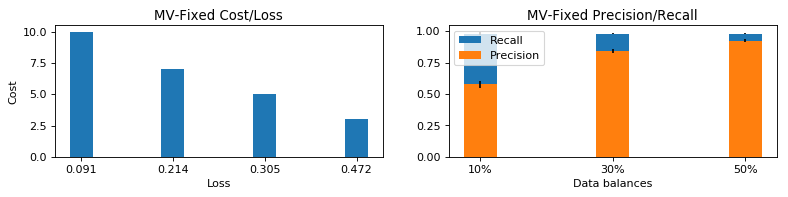

In [223]:
#smv_05 = pd.read_csv('./results/mv/simulated/it50_d50_b5_lr5/smart_stop_mv_not_expert_it50_d50_b5_cr05.csv')
data = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')



plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.tight_layout()
width = 0.05       # the width of the bars: can also be len(x) sequence

cost_mean = smv_05["cost"]/smv_05["cost_ratio"]/1000
cost_std = smv_05["cost_std"]/smv_05["cost_ratio"]/1000

plt.subplot(431)
ind = [.2, .4, .6, .8]
#balanced dataset, diff #votes
smv_05 = data[data['class_fn']=='majority_voting'][data['data_bal']==0.5][data['cost_ratio']==0.05].iloc[::-1]
p1 = plt.bar(ind, cost_mean, width, yerr=cost_std)
loss_mean = smv_05["loss"]
loss_std = smv_05["loss_std"]
plt.title('MV-Fixed Cost/Loss')
plt.ylabel("Cost")
plt.xlabel("Loss")
plt.xticks(ind, [round(x, 3) for x in smv_05['loss']])

#data balance
smv_05 = data[data['class_fn']=='majority_voting'][data['votes']==10][data['cost_ratio']==0.05]
plt.subplot(432)
ind = [.5, .3, .1]
precision_mean = smv_05["precision"]
precision_std = smv_05["precision_std"]
recall_mean = smv_05["recall"]
recall_std = smv_05["recall_std"]
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std)
p2 = plt.bar(ind, precision_mean, width, yerr=precision_std)
plt.title('MV-Fixed Precision/Recall')
#plt.ylabel("Cost")
plt.xlabel("Data balances")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'))
plt.xticks(ind, ['50%', '30%', '10%'])


plt.show()

## Comparison fixed-adaptive

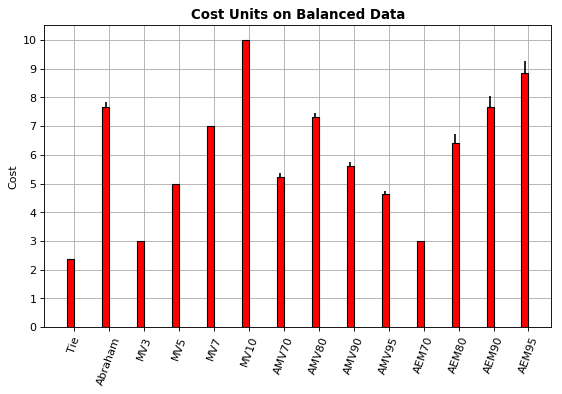

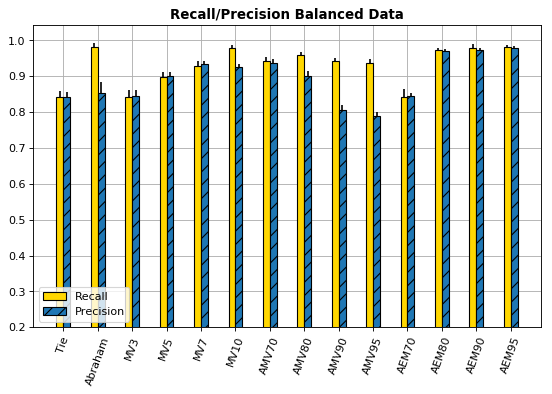

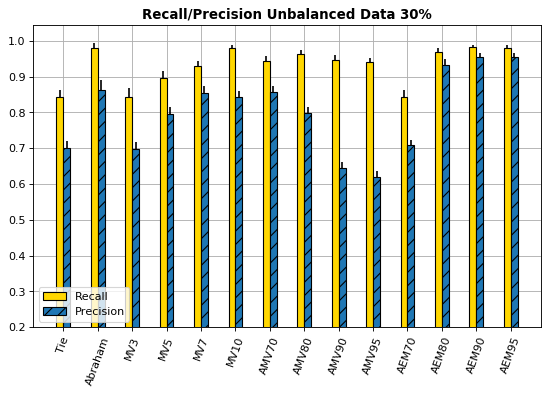

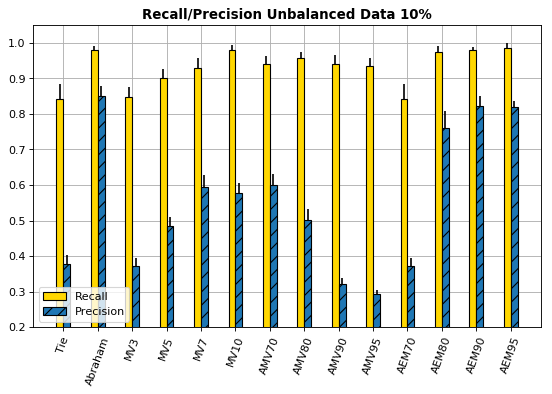

In [442]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

abraham_c = 2
abraham_e = 0.2

data_bal = 0.5
cr = 0.05
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==cr]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==cr]

datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

items = 14
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'Abraham', 'MV3', 'MV5', 'MV7', 'MV10', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
plt.figure(num=1, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)

#Balanced dataset
#1)
plt.subplot(221)
cost_mean, cost_std = get_approaches_results(datasets_print, "cost", "cost_std")
p1 = plt.bar(ind, cost_mean, width, yerr=cost_std, zorder=3, color='red', edgecolor='black')
plt.ylabel('Cost')
plt.title('Cost Units on Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,11,1))
plt.savefig("./charts/balanced_data_cost", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/balanced_data_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_val = 0.3
mv = data_mv[data_mv['data_bal']==data_val]
tie = data_tie[data_tie['data_bal']==data_val]
abraham = data_abraham[data_abraham['data_bal']==data_val][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_30_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_val = 0.1
mv = data_mv[data_mv['data_bal']==data_val]
tie = data_tie[data_tie['data_bal']==data_val]
abraham = data_abraham[data_abraham['data_bal']==data_val][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]

datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

plt.subplot(221)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std")
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std")
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, yerr=precision_std, zorder=3, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title('Recall/Precision Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0,1.01,.1))
plt.gca().set_ylim(bottom=0.2)
plt.savefig("./charts/unbalanced_data_10_quality", bbox_inches = 'tight', pad_inches = 0)
plt.show()


# Cost impact .2 (1:5) vs .1 (1:10) vs .05 (1:20)

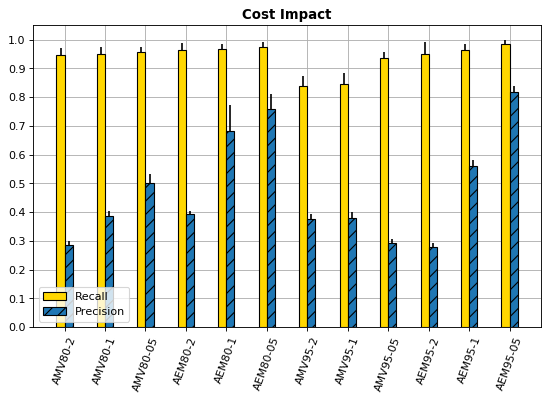

In [421]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

data_bal = 0.1

ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]
adaptive_bayes_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2][adaptive['threshold'].isin(ths)]

adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]
adaptive_bayes_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1][adaptive['threshold'].isin(ths)]

adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]
adaptive_bayes_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05][adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20, adaptive_bayes_5, adaptive_bayes_10, adaptive_bayes_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = (
                #'AMV70-2', 'AMV70-1', 'AMV70-05', \
                #'AEM70-2', 'AEM70-1', 'AEM70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AEM80-2', 'AEM80-1', 'AEM80-05', \
                #'AMV90-2', 'AMV90-1', 'AMV90-05', \
                #'AEM90-2','AEM90-1', 'AEM90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05', \
                'AEM95-2','AEM95-1', 'AEM95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

## Loss

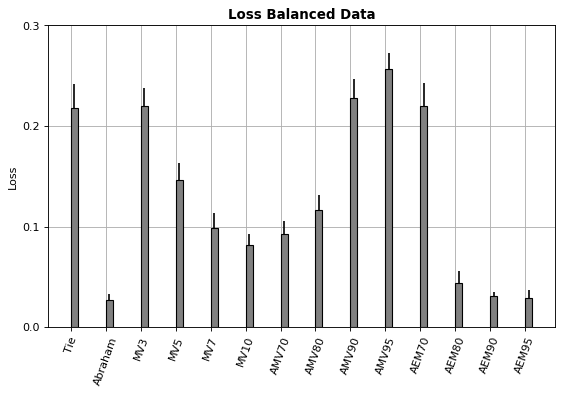

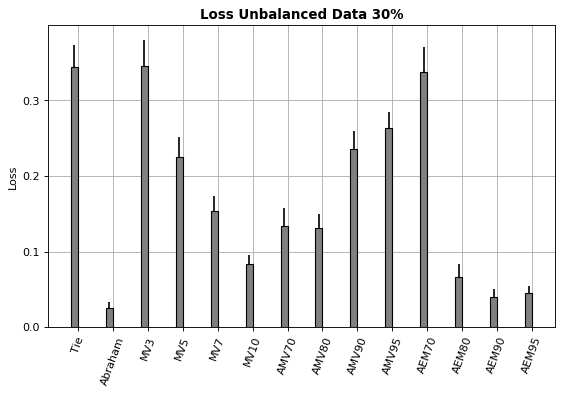

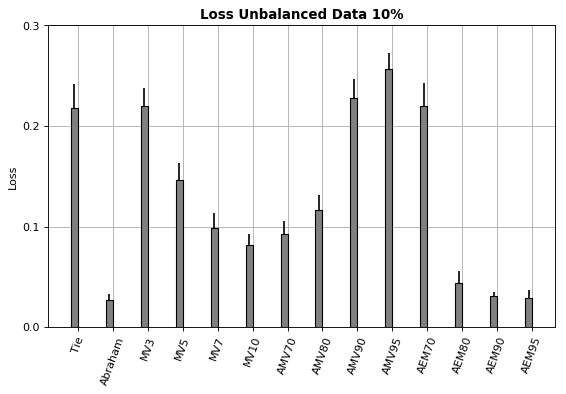

In [418]:
from IPython.core import display as ICD

data_mv = pd.read_csv('./results/simulated_dataset/all_combinations_results_mv.csv')
data_tie = pd.read_csv('./results/simulated_dataset/all_combinations_results_break_tie.csv')
data_abraham = pd.read_csv('./results/abraham/results_cs_es_varied.csv')
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

abraham_c = 2
abraham_e = 0.2

#plot
datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

items = 14
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('Tie', 'Abraham', 'MV3', 'MV5', 'MV7', 'MV10', 'AMV70', 'AMV80', 'AMV90', 'AMV95', 'AEM70', 'AEM80', 'AEM90', 'AEM95')


#Figure 1
data_bal = 0.5
mv = data_mv[data_mv['data_bal']==data_bal]
tie = data_tie[data_tie['data_bal']==data_bal]
abraham = data_abraham[data_abraham['data_bal']==data_bal][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]



#2)
plt.figure(num=2, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p2 = plt.bar(ind+width, loss_mean, width, yerr=loss_std, zorder=3, edgecolor='black', color='grey')
plt.title('Loss Balanced Data', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.ylabel('Loss')
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_balanced", bbox_inches = 'tight', pad_inches = 0)
plt.show()


#unbalanced plots
#Unbalanced datasets 30%
#3)
plt.figure(num=3, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_val = 0.3
mv = data_mv[data_mv['data_bal']==data_val]
tie = data_tie[data_tie['data_bal']==data_val]
abraham = data_abraham[data_abraham['data_bal']==data_val][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 30%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))
plt.savefig("./charts/loss_unbalanced_30", bbox_inches = 'tight', pad_inches = 0)
plt.show()

#Unbalanced datasets 10%
#4)
plt.figure(num=4, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
data_val = 0.1
mv = data_mv[data_mv['data_bal']==data_val]
tie = data_tie[data_tie['data_bal']==data_val]
abraham = data_abraham[data_abraham['data_bal']==data_val][data_abraham['c']==abraham_c][data_abraham['e']==abraham_e]
adaptive_mv = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]
adaptive_bayes = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_bayes'] \
[adaptive['data_bal']==data_val][adaptive['cost_ratio']==0.05]

datasets_print = [tie, abraham, mv, adaptive_mv, adaptive_bayes]

plt.subplot(221)
loss_mean, loss_std = get_approaches_results(datasets_print, "loss", "loss_std")
p1 = plt.bar(ind, loss_mean, width, yerr=loss_std, zorder=3, color='grey', edgecolor='black')
plt.ylabel('Loss')
plt.title('Loss Unbalanced Data 10%', fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.grid(zorder=0)
plt.yticks(np.arange(0, .4,.1))

plt.savefig("./charts/loss_unbalanced_10", bbox_inches = 'tight', pad_inches = 0)
plt.show()


## Adaptative MV over ths and crs

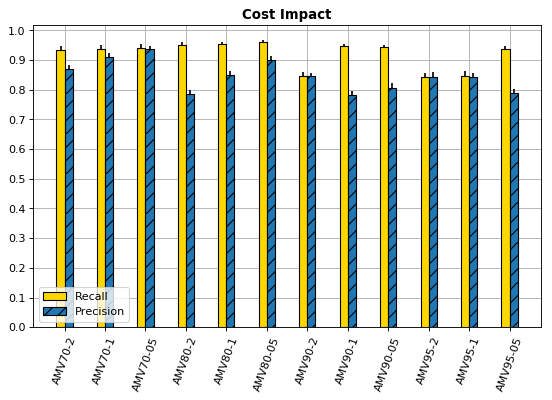

In [433]:
adaptive = pd.read_csv('./results/simulated_dataset/all_combinations_results_adaptive.csv')

data_bal = 0.5

#ths = [0.8, 0.95]

adaptive_mv_5 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.2]#[adaptive['threshold'].isin(ths)]
adaptive_mv_10 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.1]#[adaptive['threshold'].isin(ths)]
adaptive_mv_20 = adaptive[adaptive['class_fn']=='majority_voting'][adaptive['decision_fn']=='decision_function_mv'] \
[adaptive['data_bal']==data_bal][adaptive['cost_ratio']==0.05]#[adaptive['threshold'].isin(ths)]

datasets_print = [adaptive_mv_5, adaptive_mv_10, adaptive_mv_20]

items = 12
ind = np.arange(items)
width = .2
xticks_ind = ind + width / 2
xticks_rotation = 70
xticks_names = ('AMV70-2', 'AMV70-1', 'AMV70-05', \
                'AMV80-2', 'AMV80-1', 'AMV80-05', \
                'AMV90-2', 'AMV90-1', 'AMV90-05', \
                'AMV95-2','AMV95-1', 'AMV95-05')
                   

plt.figure(num=7, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.subplots_adjust(bottom = .05)
plt.subplot(221)
plt.grid(zorder=0)
precision_mean, precision_std = get_approaches_results(datasets_print, "precision", "precision_std", True)
recall_mean, recall_std = get_approaches_results(datasets_print, "recall", "recall_std", True)
p1 = plt.bar(ind, recall_mean, width, yerr=recall_std, zorder=3, color='gold', edgecolor='black')
p2 = plt.bar(ind+width, precision_mean, width, zorder=3, yerr=precision_std, edgecolor='black', hatch="//")
plt.legend((p1[0], p2[1]), ('Recall', 'Precision'), loc=3)
plt.title("Cost Impact", fontweight="bold")
plt.xticks(xticks_ind, xticks_names, rotation=xticks_rotation)
plt.yticks(np.arange(0,1.1,.1))
#plt.savefig("./charts/cost_impact", bbox_inches = 'tight', pad_inches = 0)



plt.show()

In [440]:
adaptive_mv_5

,loss_ratio,cost_ratio,class_fn,decision_fn,data_bal,threshold,cost,cost_std,loss,loss_std,recall,recall_std,precision,precision_std
120,5,0.2,majority_voting,decision_function_mv,0.5,0.70,820.116,9.612,0.232,0.035,0.935,0.013,0.869,0.014
121,5,0.2,majority_voting,decision_function_mv,0.5,0.80,834.320,7.221,0.256,0.033,0.950,0.012,0.786,0.013
122,5,0.2,majority_voting,decision_function_mv,0.5,0.90,600.000,0.000,0.465,0.041,0.845,0.016,0.845,0.012
123,5,0.2,majority_voting,decision_function_mv,0.5,0.95,600.000,0.000,0.473,0.039,0.842,0.015,0.844,0.016
